In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
raw_data = pd.read_csv("LendingClub2012to2013.csv", low_memory = False,skiprows=[0,188183,188184])

In [3]:
raw_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10129506,11981122,20800,20800,20800.000000,36 months,13.53%,706.16,B,B5,...,0.0,3.0,90.2,50.0,0,0,43100.0,23473.0,15000.0,0.0
1,10159498,1319523,12000,12000,12000.000000,36 months,6.62%,368.45,A,A2,...,0.0,2.0,95.5,0.0,0,0,333044.0,42603.0,52600.0,42769.0
2,10129454,11981072,12000,12000,12000.000000,36 months,10.99%,392.81,B,B2,...,0.0,4.0,100.0,0.0,0,0,29700.0,7137.0,18100.0,0.0
3,10139658,11991209,12000,12000,12000.000000,36 months,13.53%,407.40,B,B5,...,0.0,2.0,81.2,33.3,0,0,18130.0,13605.0,7000.0,10030.0
4,10127816,11979581,24000,24000,24000.000000,36 months,13.53%,814.80,B,B5,...,0.0,2.0,100.0,75.0,0,0,229072.0,61397.0,21500.0,58847.0
5,10119590,11971211,11500,11500,11500.000000,60 months,22.90%,323.54,E,E4,...,0.0,2.0,100.0,50.0,0,0,30891.0,24724.0,9000.0,16791.0
6,10149577,12001118,28000,28000,28000.000000,36 months,7.62%,872.52,A,A3,...,0.0,5.0,100.0,16.7,0,0,850886.0,199739.0,42200.0,196686.0
7,10119623,11971241,12000,12000,12000.000000,36 months,11.99%,398.52,B,B3,...,0.0,3.0,100.0,1.0,0,0,365874.0,44327.0,10700.0,57674.0
8,10159611,12011228,10000,10000,10000.000000,36 months,9.67%,321.13,B,B1,...,0.0,1.0,77.3,66.7,0,0,58486.0,39143.0,9200.0,36186.0
9,10179520,12031088,3000,3000,3000.000000,36 months,12.85%,100.87,B,B4,...,0.0,1.0,91.3,66.7,2,0,32082.0,19530.0,4300.0,26782.0


In [4]:
print(raw_data['loan_status'].unique())
print(raw_data.shape)

['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']
(188181, 115)


In [5]:
# Let's eliminate the rows that aren't "complete"
# There's a decision to make here... technically, any defaulted loan could pay off.
# So we will drop the current loans and the ones that are a few months late and leave behind the defaults and the paid off loans
no_incomplete_rows = raw_data[raw_data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
no_incomplete_rows['loan_status'] = no_incomplete_rows['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)
no_incomplete_rows.shape

# notice we only lose about 16,000 loans.  why might this be?
# maximum term length for loans on lending club is 60 months

#no_incomplete_rows.to_csv("test.csv", index = False) # This is what I uploaded to DataRobot to demostrate to the class 

(171483, 115)

In [6]:
#my attempt
customer_id = ['id']
leakage_to_drop = ['recoveries', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low', 'last_credit_pull_d', 'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d', 'total_rec_late_fee', 'total_rec_int', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'next_pymnt_d']
urldesc_to_drop = ['url','desc'] # These columns are not useful for our purposes
no_information_features_to_drop = ['all_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'total_bal_il', 'verification_status_joint', 'annual_inc_joint', 'application_type',  'policy_code', 'total_cu_tl']
#how did I know there was no information here?

drop_cols = ['addr_state','title','earliest_cr_line']# the purpose and title columns do contain
#overlapping information,but the purpose column contains fewer discrete values and is cleaner,
#so we’ll keep it and drop title.addr_state has too many unique text values of no use.

no_information_no_leakage = no_incomplete_rows.drop(drop_cols+no_information_features_to_drop+urldesc_to_drop + leakage_to_drop + customer_id, axis = 1)

print(no_information_no_leakage.shape)

(171483, 72)


In [7]:
half_count = len(no_information_no_leakage)/2
no_information_no_leakage = no_information_no_leakage.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
print(no_information_no_leakage.shape)

(171483, 67)


In [8]:
no_information_no_leakage['fico_average'] = (no_information_no_leakage['fico_range_high'] + no_information_no_leakage['fico_range_low']) / 2
cols = ['fico_range_low','fico_range_high','fico_average']
no_information_no_leakage[cols].head()

,fico_range_low,fico_range_high,fico_average
0,685,689,687.0
2,720,724,722.0
3,660,664,662.0
4,660,664,662.0
6,745,749,747.0


In [9]:
drop_cols = ['fico_range_low',
             'fico_range_high']
data_afterfico = no_information_no_leakage.drop(drop_cols, axis=1)
data_afterfico.shape

(171483, 66)

In [10]:
null_counts = data_afterfico.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     10831
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
zip_code                          0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      117
total_acc                         0
initial_list_status       

In [11]:
drop_cols = ['emp_title','bc_util','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
             'mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
            'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
            'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort',
            'total_bc_limit','total_il_high_credit_limit','tot_cur_bal','total_rev_hi_lim','acc_open_past_24mths','avg_cur_bal',
            'bc_open_to_buy','mo_sin_old_il_acct','tot_coll_amt']
data_nullsremoved = data_afterfico.drop(drop_cols, axis=1)
data_nullsremoved.shape


(171483, 33)

In [12]:
null_countsnew = data_nullsremoved.isnull().sum()
print("Number of null values in each column:\n{}".format(null_countsnew))

Number of null values in each column:
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
zip_code                        0
dti                             0
delinq_2yrs                     0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                    117
total_acc                       0
initial_list_status             0
collections_12_mths_ex_med      0
acc_now_delinq                  0
chargeoff_

In [13]:

import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
import numpy as np

variables_i_want_to_try = ['int_rate','grade','term','installment','loan_amnt','annual_inc',
                           'emp_length','fico_average','loan_status']
df = data_nullsremoved[variables_i_want_to_try]

#need to create some dummy variables
term_dummies = pd.get_dummies(df['term'], prefix="term_")
grade_dummies = pd.get_dummies(df['grade'], prefix="grade")


#combine the dummies back in
df = pd.concat([df, term_dummies, grade_dummies], axis=1)
#rename the term columns
df.rename(columns={'term__ 36 months': 'term_36_months', 'term__ 60 months': 'term_60_months'}, inplace=True)

# and it looks like there's a pesky % symbol in my interest rate variable
df['int_rate'] = df['int_rate'].apply(lambda x: x.strip('%'))

# now pick out the ones that I want to keep
variables_with_dummies = ['installment','loan_amnt','annual_inc','term_36_months','fico_average',
                          'term_60_months', 'grade_A', 'grade_B','int_rate', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 
                          'grade_G']

X = df[variables_with_dummies]
y = df['loan_status']

clnm=list(X)

In [14]:
# Standardize the data attributes.
from sklearn import preprocessing
print(X.shape)

# standardize the data attributes
standardized_X = preprocessing.scale(X)
X
st_X = pd.DataFrame(standardized_X)

(171483, 14)


In [15]:
st_X
st_X.columns = clnm

In [16]:

#cross validation

cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=1000000000000)
#model_selection.cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

included = []
score_values = [0.5]
while len(included) < len(variables_with_dummies):
    score = 0.5
    best = ""
    for i in variables_with_dummies:
        if i not in included:
            attempt = included + [i]
            new_score = np.mean(model_selection.cross_val_score(lr, X[attempt], y, cv=cv, scoring='roc_auc'))
            print("     %s: %f" %(str(attempt), new_score))
            if new_score > score: 
                best = i
                score = new_score
    included = included + [best]
    score_values = score_values + [score]
    print("Best model for this round: %s: %f" %(str(included), score))

     ['installment']: 0.539066
     ['loan_amnt']: 0.527339
     ['annual_inc']: 0.555894
     ['term_36_months']: 0.603925
     ['fico_average']: 0.588323
     ['term_60_months']: 0.603925
     ['grade_A']: 0.563553
     ['grade_B']: 0.564159
     ['int_rate']: 0.677046
     ['grade_C']: 0.524129
     ['grade_D']: 0.540717
     ['grade_E']: 0.534973
     ['grade_F']: 0.522754
     ['grade_G']: 0.505139
Best model for this round: ['int_rate']: 0.677046
     ['int_rate', 'installment']: 0.677226
     ['int_rate', 'loan_amnt']: 0.351421
     ['int_rate', 'annual_inc']: 0.553649
     ['int_rate', 'term_36_months']: 0.689433
     ['int_rate', 'fico_average']: 0.672933
     ['int_rate', 'term_60_months']: 0.689433
     ['int_rate', 'grade_A']: 0.677043
     ['int_rate', 'grade_B']: 0.677045
     ['int_rate', 'grade_C']: 0.677068
     ['int_rate', 'grade_D']: 0.677011
     ['int_rate', 'grade_E']: 0.677020
     ['int_rate', 'grade_F']: 0.677046
     ['int_rate', 'grade_G']: 0.677044
Best mod

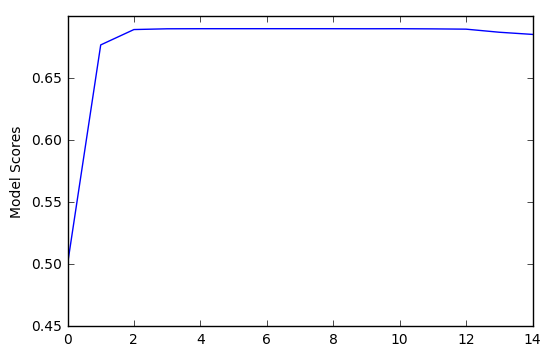

In [34]:
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()

In [17]:
#cross validation

cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=1000000000000)
#model_selection.cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

included = []
score_values = [0.5]
while len(included) < len(variables_with_dummies):
    score = 0.5
    best = ""
    for i in variables_with_dummies:
        if i not in included:
            attempt = included + [i]
            new_score = np.mean(model_selection.cross_val_score(lr, st_X[attempt], y, cv=cv, scoring='roc_auc'))
            print("     %s: %f" %(str(attempt), new_score))
            if new_score > score: 
                best = i
                score = new_score
    included = included + [best]
    score_values = score_values + [score]
    print("Best model for this round: %s: %f" %(str(included), score))

     ['installment']: 0.539066
     ['loan_amnt']: 0.552596
     ['annual_inc']: 0.555894
     ['term_36_months']: 0.603925
     ['fico_average']: 0.588323
     ['term_60_months']: 0.603925
     ['grade_A']: 0.563553
     ['grade_B']: 0.564159
     ['int_rate']: 0.677046
     ['grade_C']: 0.524129
     ['grade_D']: 0.540717
     ['grade_E']: 0.534973
     ['grade_F']: 0.522754
     ['grade_G']: 0.505139
Best model for this round: ['int_rate']: 0.677046
     ['int_rate', 'installment']: 0.677215
     ['int_rate', 'loan_amnt']: 0.678024
     ['int_rate', 'annual_inc']: 0.683088
     ['int_rate', 'term_36_months']: 0.689433
     ['int_rate', 'fico_average']: 0.676763
     ['int_rate', 'term_60_months']: 0.689433
     ['int_rate', 'grade_A']: 0.677043
     ['int_rate', 'grade_B']: 0.677045
     ['int_rate', 'grade_C']: 0.677068
     ['int_rate', 'grade_D']: 0.677011
     ['int_rate', 'grade_E']: 0.677020
     ['int_rate', 'grade_F']: 0.677046
     ['int_rate', 'grade_G']: 0.677044
Best mod

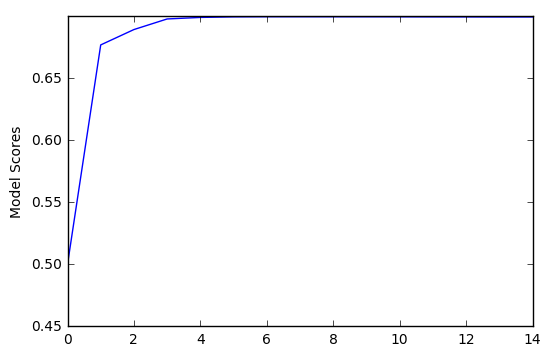

In [18]:
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()

In [19]:
import pandas as pd
pd.options.mode.chained_assignment = None
raw_data = pd.read_csv("LendingClub2012to2013.csv", low_memory = False,skiprows=[0,188183,188184])
raw_data
print(raw_data['loan_status'].unique())
print(raw_data.shape)
# Let's eliminate the rows that aren't "complete"
# There's a decision to make here... technically, any defaulted loan could pay off.
# So we will drop the current loans and the ones that are a few months late and leave behind the defaults and the paid off loans
no_incomplete_rows = raw_data[raw_data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
no_incomplete_rows['loan_status'] = no_incomplete_rows['loan_status'].apply(lambda x: 0 if x == "Fully Paid" else 1)
no_incomplete_rows.shape

# notice we only lose about 16,000 loans.  why might this be?
# maximum term length for loans on lending club is 60 months

#no_incomplete_rows.to_csv("test.csv", index = False) # This is what I uploaded to DataRobot to demostrate to the class
#my attempt
customer_id = ['id']
leakage_to_drop = ['recoveries', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low', 'last_credit_pull_d', 'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d', 'total_rec_late_fee', 'total_rec_int', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'next_pymnt_d']
urldesc_to_drop = ['url','desc'] # These columns are not useful for our purposes
no_information_features_to_drop = ['all_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mths_since_rcnt_il', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'total_bal_il', 'verification_status_joint', 'annual_inc_joint', 'application_type',  'policy_code', 'total_cu_tl']
#how did I know there was no information here?

drop_cols = ['addr_state','title','earliest_cr_line']# the purpose and title columns do contain
#overlapping information,but the purpose column contains fewer discrete values and is cleaner,
#so we’ll keep it and drop title.addr_state has too many unique text values of no use.

no_information_no_leakage = no_incomplete_rows.drop(drop_cols+no_information_features_to_drop+urldesc_to_drop + leakage_to_drop + customer_id, axis = 1)

print(no_information_no_leakage.shape)
half_count = len(no_information_no_leakage)/2
no_information_no_leakage = no_information_no_leakage.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
print(no_information_no_leakage.shape)
no_information_no_leakage['fico_average'] = (no_information_no_leakage['fico_range_high'] + no_information_no_leakage['fico_range_low']) / 2
cols = ['fico_range_low','fico_range_high','fico_average']
no_information_no_leakage[cols].head()
drop_cols = ['fico_range_low',
             'fico_range_high']
data_afterfico = no_information_no_leakage.drop(drop_cols, axis=1)
data_afterfico.shape
null_counts = data_afterfico.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))
drop_cols = ['emp_title','bc_util','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
             'mths_since_recent_bc','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
            'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
            'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort',
            'total_bc_limit','total_il_high_credit_limit','tot_cur_bal','total_rev_hi_lim','acc_open_past_24mths','avg_cur_bal',
            'bc_open_to_buy','mo_sin_old_il_acct','tot_coll_amt']
data_nullsremoved = data_afterfico.drop(drop_cols, axis=1)
data_nullsremoved.shape

null_countsnew = data_nullsremoved.isnull().sum()
print("Number of null values in each column:\n{}".format(null_countsnew))
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
import numpy as np

variables_i_want_to_try = ['int_rate','grade','term','installment','loan_amnt','annual_inc',
                           'emp_length','fico_average','loan_status']
df = data_nullsremoved[variables_i_want_to_try]

#need to create some dummy variables
term_dummies = pd.get_dummies(df['term'], prefix="term_")
grade_dummies = pd.get_dummies(df['grade'], prefix="grade")


#combine the dummies back in
df = pd.concat([df, term_dummies, grade_dummies], axis=1)
#rename the term columns
df.rename(columns={'term__ 36 months': 'term_36_months', 'term__ 60 months': 'term_60_months'}, inplace=True)

# and it looks like there's a pesky % symbol in my interest rate variable
df['int_rate'] = df['int_rate'].apply(lambda x: x.strip('%'))

# now pick out the ones that I want to keep
variables_with_dummies = ['installment','loan_amnt','annual_inc','term_36_months','fico_average',
                          'term_60_months', 'grade_A', 'grade_B','int_rate', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 
                          'grade_G']

X = df[variables_with_dummies]
y = df['loan_status']

clnm=list(X)
# Standardize the data attributes.
from sklearn import preprocessing
print(X.shape)

# standardize the data attributes
standardized_X = preprocessing.scale(X)
X
st_X = pd.DataFrame(standardized_X)
st_X
st_X.columns = clnm


['Fully Paid' 'Current' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']
(188181, 115)
(171483, 72)
(171483, 67)
Number of null values in each column:
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     10831
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
zip_code                          0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec              

     ['installment']: 0.539066
     ['loan_amnt']: 0.527339
     ['annual_inc']: 0.555894
     ['term_36_months']: 0.603925
     ['fico_average']: 0.588323
     ['term_60_months']: 0.603925
     ['grade_A']: 0.563553
     ['grade_B']: 0.564159
     ['int_rate']: 0.677046
     ['grade_C']: 0.524129
     ['grade_D']: 0.540717
     ['grade_E']: 0.534973
     ['grade_F']: 0.522754
     ['grade_G']: 0.505139
Best model for this round: ['int_rate']: 0.677046
     ['int_rate', 'installment']: 0.677226
     ['int_rate', 'loan_amnt']: 0.351421
     ['int_rate', 'annual_inc']: 0.553649
     ['int_rate', 'term_36_months']: 0.689433
     ['int_rate', 'fico_average']: 0.672933
     ['int_rate', 'term_60_months']: 0.689433
     ['int_rate', 'grade_A']: 0.677043
     ['int_rate', 'grade_B']: 0.677045
     ['int_rate', 'grade_C']: 0.677068
     ['int_rate', 'grade_D']: 0.677011
     ['int_rate', 'grade_E']: 0.677020
     ['int_rate', 'grade_F']: 0.677046
     ['int_rate', 'grade_G']: 0.677044
Best mod

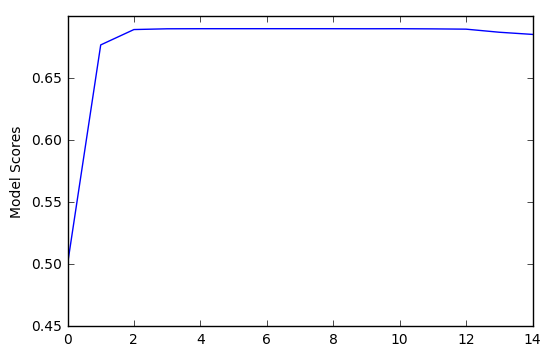

In [20]:
#### Crossvalidation without standardization
cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=1000000000000)
#model_selection.cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

included = []
score_values = [0.5]
while len(included) < len(variables_with_dummies):
    score = 0.5
    best = ""
    for i in variables_with_dummies:
        if i not in included:
            attempt = included + [i]
            new_score = np.mean(model_selection.cross_val_score(lr, X[attempt], y, cv=cv, scoring='roc_auc'))
            print("     %s: %f" %(str(attempt), new_score))
            if new_score > score: 
                best = i
                score = new_score
    included = included + [best]
    score_values = score_values + [score]
    print("Best model for this round: %s: %f" %(str(included), score))
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()


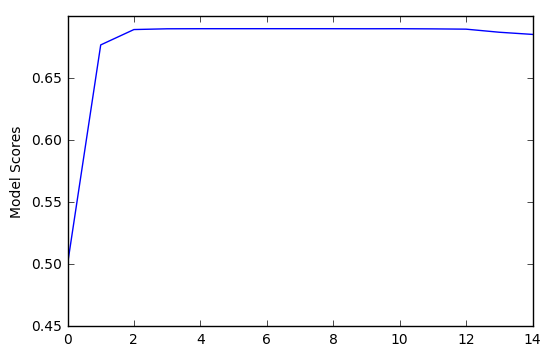

In [21]:
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()

     ['installment']: 0.539066
     ['loan_amnt']: 0.552596
     ['annual_inc']: 0.555894
     ['term_36_months']: 0.603925
     ['fico_average']: 0.588323
     ['term_60_months']: 0.603925
     ['grade_A']: 0.563553
     ['grade_B']: 0.564159
     ['int_rate']: 0.677046
     ['grade_C']: 0.524129
     ['grade_D']: 0.540717
     ['grade_E']: 0.534973
     ['grade_F']: 0.522754
     ['grade_G']: 0.505139
Best model for this round: ['int_rate']: 0.677046
     ['int_rate', 'installment']: 0.677215
     ['int_rate', 'loan_amnt']: 0.678024
     ['int_rate', 'annual_inc']: 0.683088
     ['int_rate', 'term_36_months']: 0.689433
     ['int_rate', 'fico_average']: 0.676763
     ['int_rate', 'term_60_months']: 0.689433
     ['int_rate', 'grade_A']: 0.677043
     ['int_rate', 'grade_B']: 0.677045
     ['int_rate', 'grade_C']: 0.677068
     ['int_rate', 'grade_D']: 0.677011
     ['int_rate', 'grade_E']: 0.677020
     ['int_rate', 'grade_F']: 0.677046
     ['int_rate', 'grade_G']: 0.677044
Best mod

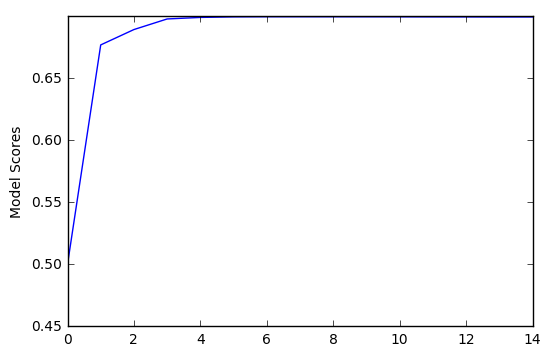

In [22]:
#### Crossvalidation with standardization
cv = model_selection.KFold(5)
lr = linear_model.LogisticRegression(C=1000000000000)
#model_selection.cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

included = []
score_values = [0.5]
while len(included) < len(variables_with_dummies):
    score = 0.5
    best = ""
    for i in variables_with_dummies:
        if i not in included:
            attempt = included + [i]
            new_score = np.mean(model_selection.cross_val_score(lr, st_X[attempt], y, cv=cv, scoring='roc_auc'))
            print("     %s: %f" %(str(attempt), new_score))
            if new_score > score: 
                best = i
                score = new_score
    included = included + [best]
    score_values = score_values + [score]
    print("Best model for this round: %s: %f" %(str(included), score))
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()

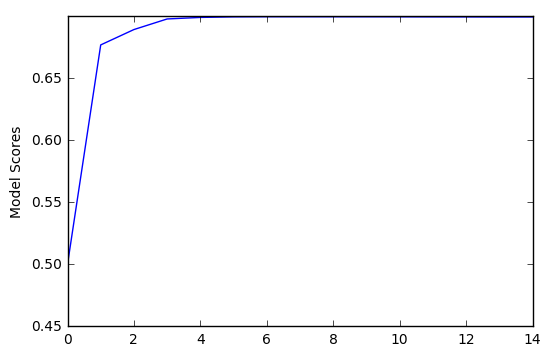

In [23]:
plt.plot(score_values)
plt.ylabel('Model Scores')
plt.show()